In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [80]:
data=pd.read_csv('BTCUSD.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9029175788
1,2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,10174126415
2,2019-03-06,3897.081055,3919.510498,3871.460693,3903.942627,3903.942627,9175291529
3,2019-03-07,3903.384766,3939.373291,3894.113037,3911.484375,3911.484375,9584165519
4,2019-03-08,3913.225830,3950.432129,3875.228516,3901.131592,3901.131592,10638638944
...,...,...,...,...,...,...,...
1823,2024-02-29,62499.183594,63585.644531,60498.730469,61198.382813,61198.382813,65496611844
1824,2024-03-01,61168.062500,63155.101563,60802.527344,62440.632813,62440.632813,40186368423
1825,2024-03-02,62431.652344,62458.699219,61657.289063,62029.847656,62029.847656,23888473685
1826,2024-03-03,62031.578125,63230.210938,61435.023438,63167.371094,63167.371094,26253811450


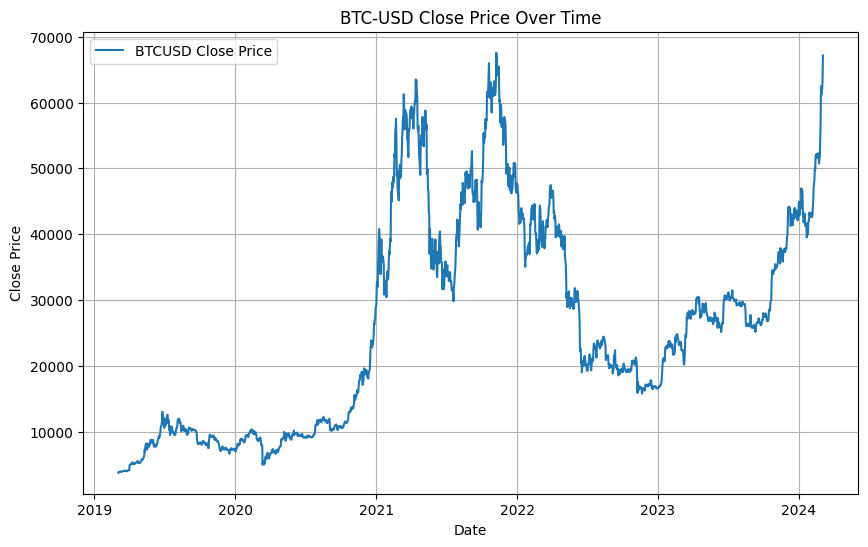

In [81]:
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='BTCUSD Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC-USD Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
len(data)

1828

In [83]:
'''
Extracting the data for the year <2023
'''
data_train=data[data['Date'].dt.year.isin([2020,2021,2022])]
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
303,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
304,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
305,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
306,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
307,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...,...
1394,2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239
1395,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
1396,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
1397,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910


In [84]:

data_2023=data[data['Date'].dt.year == 2023]
data_2023

,Date,Open,High,Low,Close,Adj Close,Volume
1399,2023-01-01,16547.914063,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1400,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
1401,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
1402,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
1403,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566
...,...,...,...,...,...,...,...
1759,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
1760,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
1761,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
1762,2023-12-30,42091.753906,42584.125000,41556.226563,42156.902344,42156.902344,16013925945


In [85]:
'''
Defining the 'train' and 'test' series
'''
train=data_train['Close'].values
test=data_2023['Close'].values

In [86]:
'''
Feature Scaling
'''
from sklearn.preprocessing import MinMaxScaler
in_scaler=MinMaxScaler(feature_range=(-1,1))
train=in_scaler.fit_transform(train.reshape(-1,1))
test=in_scaler.transform(test.reshape(-1,1))

In [87]:
'''
Defining the sequences and the window size
'''
ws=9 # windows size
def data_loader(train, test,window_size,output_window_size):
    train_seq=[]
    train_tar=[]
    test_seq=[]
    test_tar=[]
    
    for i in range(len(train)-window_size):
        train_seq.append(train[i:i+window_size])
        train_tar.append(train[i+window_size:i+ws+output_window_size])
    for i in range(len(test)-window_size):
        test_seq.append(test[i:i+window_size])
        test_tar.append(test[i+window_size:i+window_size+output_window_size])
    return [train_seq, train_tar, test_seq, test_tar]

train_seq,train_tar, test_seq, test_tar=data_loader(train, test,ws,1)

In [88]:
'''
Converting the sequence arrays and target arrays into tensors
'''
train_seq=torch.Tensor(np.array(train_seq))
train_tar=torch.Tensor(np.array(train_tar))
test_seq=torch.Tensor(np.array(test_seq))
test_tar=torch.Tensor(np.array(test_tar))

In [89]:
train_seq.shape, train_tar.shape,test_seq.shape,test_tar.shape

(torch.Size([1087, 9, 1]),
 torch.Size([1087, 1, 1]),
 torch.Size([356, 9, 1]),
 torch.Size([356, 1, 1]))

In [90]:
'''
Reducing the dimensions of train_tar to fit the model
'''
train_tar=train_tar.squeeze(-1)

In [91]:
train_seq.shape, train_tar.shape,test_seq.shape,test_tar.shape

(torch.Size([1087, 9, 1]),
 torch.Size([1087, 1]),
 torch.Size([356, 9, 1]),
 torch.Size([356, 1, 1]))

# Model Architecture

In [92]:
# using the GPU

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_seq=train_seq.to(device)
train_tar=train_tar.to(device)
test_seq=test_seq.to(device)
test_tar=test_tar.to(device)

In [93]:
'''
Defining the hyperparmeters
'''
input_size=1 # only 1 feature is used as input i.e. 'Close' price
hidden_dim1=1500 # LSTM layer will contain 1500 hidden cells
num_layers=2 # 2 LSTM layers are used (stacked togheter)
output_size=1 # only 1 feature is going to be predicted i.e. 'Close' price

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_dim1, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_dim1=hidden_dim1
        self.num_layers=num_layers
        self.lstm1=nn.LSTM(input_size, hidden_dim1, num_layers, batch_first=True)
        self.l1=nn.Linear(hidden_dim1, output_size)
        self.relu=nn.ReLU()
        
    def forward(self, x):
        h0=torch.zeros(self.num_layers, x.size(0), self.hidden_dim1).requires_grad_().to(device)
        c0=torch.zeros(self.num_layers, x.size(0), self.hidden_dim1).requires_grad_().to(device)
        
        
        lstm_out1,(hn,cn)=self.lstm1(x,(h0.detach(), c0.detach()))
        output=self.l1(lstm_out1[:,-1,:])
        return output

In [94]:
'''
Defining the loss function and the optimizer
'''
model=LSTM(input_size=input_size, hidden_dim1=hidden_dim1, num_layers=num_layers,output_size=output_size) # creating an object of the above class
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

model=model.to(device)

# Training

In [95]:
'''
The model is trained on 100 epochs
'''
epochs=100 
e_loss=[]
for epoch in range(epochs):
    
    y_pred=model(train_seq)
    loss=criterion(y_pred, train_tar)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    e_loss.append(loss.item())
    if epoch %10 ==0 : print('Epoch [{}/{}]  Loss: {}'.format(epoch, epochs, loss.item()))

Epoch [0/100]  Loss: 0.34253808856010437
Epoch [10/100]  Loss: 0.24538706243038177
Epoch [20/100]  Loss: 0.008282666094601154
Epoch [30/100]  Loss: 0.00988020934164524
Epoch [40/100]  Loss: 0.010255909524857998
Epoch [50/100]  Loss: 0.007456253748387098
Epoch [60/100]  Loss: 0.005756129510700703
Epoch [70/100]  Loss: 0.005622527562081814
Epoch [80/100]  Loss: 0.00533739710226655
Epoch [90/100]  Loss: 0.005052930675446987


Text(0.5, 1.0, 'Loss vs Epochs')

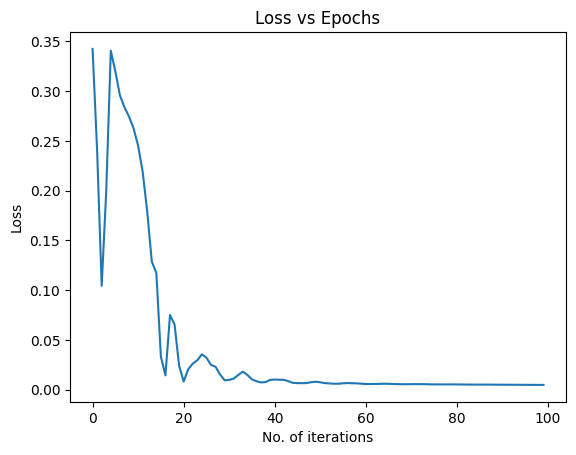

In [96]:
'''
Plotting the loss
'''
x=range(epochs)
plt.plot(x,e_loss)
plt.xlabel('No. of iterations')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

# Testing

In [97]:
'''
Predicting the prices for 2023
'''
test_pred=model(test_seq).cpu().detach().numpy()
print(test_pred.shape)
test_pred=in_scaler.inverse_transform(test_pred).flatten()

test_tar=in_scaler.inverse_transform(test_tar.squeeze(-1).cpu().detach().numpy()).flatten()



(356, 1)


In [63]:
'''
Calculating the R2 score
'''
from sklearn.metrics import r2_score
r2_score(test_tar, test_pred)

0.9571684952189304

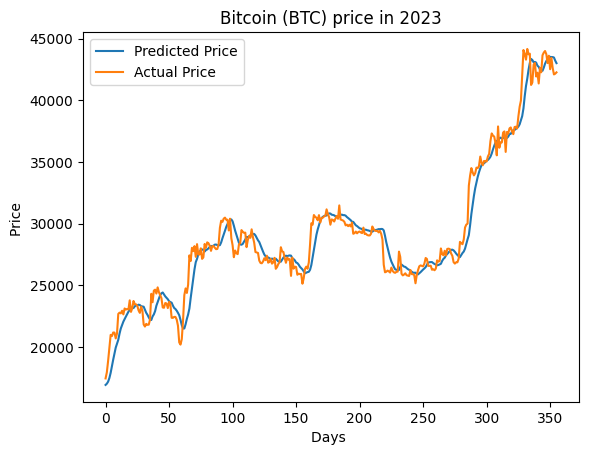

In [64]:
'''
Plotting the predicted prices against the actual prices
'''
plt.title('Bitcoin (BTC) price in 2023')
plt.plot(test_pred, label='Predicted Price')
plt.plot(test_tar, label='Actual Price')
plt.ylabel('Price ')
plt.xlabel('Days ')
plt.legend()
plt.show()

In [65]:
# calculating the mean squared error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_tar, test_pred)/len(test_tar)

mse_purcentage = mse/np.mean(test_tar)

print('On average, the model is wrong by', mse_purcentage*100, '% of the actual price.')


On average, the model is wrong by 13.148079287731692 % of the actual price.


In [66]:
class CNN(nn.Module):
    def __init__(self, input_size, hidden_dim1, num_layers, output_size):
        super(CNN, self).__init__()
        self.hidden_dim1=hidden_dim1
        self.num_layers=num_layers
        self.cnn1=nn.Conv1d(input_size, hidden_dim1, kernel_size=3, stride=1, padding=1)
        self.l1=nn.Linear(hidden_dim1, output_size)
        self.relu=nn.ReLU()
        
    def forward(self, x):
        cnn_out1=self.cnn1(x)
        output=self.l1(cnn_out1[:,-1,:])
        return output

In [67]:
# CNN-LSTM model

class CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_dim1, num_layers, output_size):
        super(CNN_LSTM, self).__init__()
        self.hidden_dim1=hidden_dim1
        self.num_layers=num_layers
        self.cnn1=nn.Conv1d(input_size, hidden_dim1, kernel_size=3, stride=1, padding=1)
        self.pool1=nn.MaxPool1d(kernel_size=2, stride=2)
        self.cnn2= nn.Conv1d(hidden_dim1, hidden_dim1, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)
        self.cnn3= nn.Conv1d(hidden_dim1, hidden_dim1, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.lstm1=nn.LSTM(hidden_dim1, 200, num_layers, batch_first=True)
        self.dropout=nn.Dropout(p=0.5)
        self.l1=nn.Linear(200, output_size)

        self.relu=nn.ReLU()
        
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu(out)
        out = self.pool1(out)
        # out = self.cnn2(out)
        # out = self.relu(out)
        # out = self.pool2(out)
        # out = self.cnn3(out)
        # out = self.pool3(out)
        out = self.dropout(out)
        out = out.permute(0, 2, 1)
        lstm_out1,(hn,cn)=self.lstm1(out)
        output=self.l1(lstm_out1[:,-1,:])
        return output

In [68]:
train_seq_cnn= train_seq.permute(0, 2, 1)
test_seq_cnn= test_seq.permute(0, 2, 1)

In [69]:
model = CNN_LSTM(input_size=input_size, hidden_dim1=1500, num_layers=num_layers,output_size=output_size) # creating an object of the above class
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

model=model.to(device)

epochs=100
e_loss=[]
for epoch in range(epochs):
    
    y_pred=model(train_seq_cnn)
    loss=criterion(y_pred, train_tar)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    e_loss.append(loss.item())
    if epoch %10 ==0 : print('Epoch [{}/{}]  Loss: {}'.format(epoch, epochs, loss.item()))

Epoch [0/100]  Loss: 0.3103260397911072
Epoch [10/100]  Loss: 0.023666271939873695
Epoch [20/100]  Loss: 0.00788789987564087
Epoch [30/100]  Loss: 0.0060556745156645775
Epoch [40/100]  Loss: 0.005629429593682289
Epoch [50/100]  Loss: 0.004984415136277676
Epoch [60/100]  Loss: 0.00465660123154521
Epoch [70/100]  Loss: 0.0042211562395095825
Epoch [80/100]  Loss: 0.0039574638940393925
Epoch [90/100]  Loss: 0.0035985044669359922


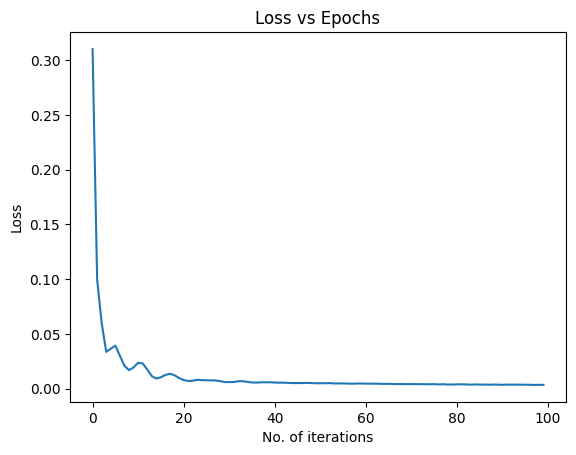

In [70]:
# Plotting the loss
x=range(epochs)
plt.plot(x,e_loss)
plt.xlabel('No. of iterations')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

(356, 1)


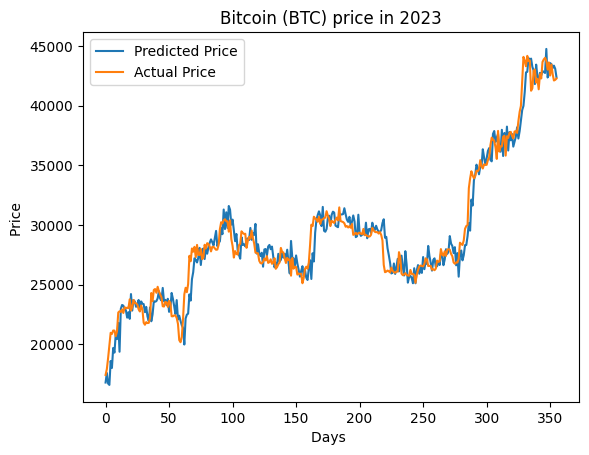

In [71]:
# testing the model

test_pred=model(test_seq_cnn).cpu().detach().numpy()
print(test_pred.shape)
test_pred=in_scaler.inverse_transform(test_pred).flatten()


# calculating the R2 score

r2_score(test_tar, test_pred)

# plotting the predicted prices against the actual prices

plt.title('Bitcoin (BTC) price in 2023')
plt.plot(test_pred, label='Predicted Price')
plt.plot(test_tar, label='Actual Price')
plt.ylabel('Price ')
plt.xlabel('Days ')
plt.legend()
plt.show()

In [72]:
mse = mean_squared_error(test_tar, test_pred)/len(test_tar)

mse_purcentage = mse/np.mean(test_tar)

print('On average, the model is wrong by', mse_purcentage*100, '% of the actual price.')

On average, the model is wrong by 13.947779595319524 % of the actual price.


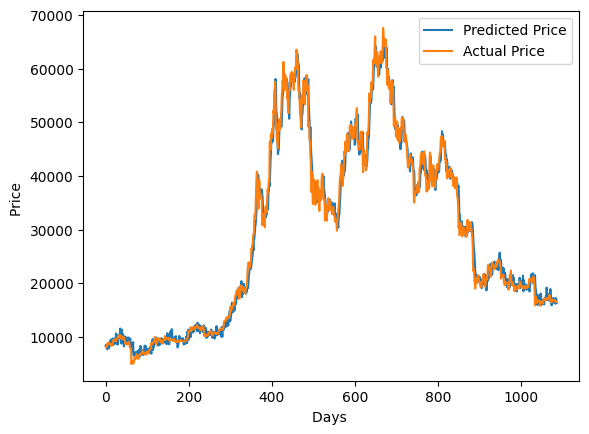

In [73]:
# on the train 

train_pred=model(train_seq_cnn).cpu().detach().numpy()

train_pred=in_scaler.inverse_transform(train_pred).flatten()



plt.plot(train_pred, label='Predicted Price')
plt.plot(in_scaler.inverse_transform(train_tar.cpu().detach().numpy()).flatten(), label='Actual Price')
plt.ylabel('Price ')
plt.xlabel('Days ')
plt.legend()
plt.show()


In [114]:
# SDAE

class SDAE(nn.Module):
    def __init__(self, input_size, hidden_dim1, num_layers, output_size):
        super(SDAE, self).__init__()
        self.hidden_dim1=hidden_dim1
        self.num_layers=num_layers

        self.encoder = nn.Sequential(
            nn.Linear(input_size, 100),
            nn.ReLU(True),
            nn.Linear(100, 50),
            nn.ReLU(True), nn.Linear(50, 1))
        self.decoder = nn.Sequential(
            nn.Linear(1, 50),
            nn.ReLU(True),
            nn.Linear(50, 100),
            nn.ReLU(True),
            nn.Linear(100, 25))
        self.l1=nn.Linear(25, output_size)
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        output=self.l1(x[:,-1,:])
        return output

In [115]:
model = SDAE(input_size=input_size, hidden_dim1=1500, num_layers=num_layers,output_size=output_size) # creating an object of the above class
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

model=model.to(device)

epochs=100
e_loss=[]
for epoch in range(epochs):

    y_pred = model(train_seq)
    loss = criterion(y_pred, train_tar)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    e_loss.append(loss.item())
    if epoch %10 ==0 : print('Epoch [{}/{}]  Loss: {}'.format(epoch, epochs, loss.item()))

Epoch [0/100]  Loss: 0.35686957836151123
Epoch [10/100]  Loss: 0.28829219937324524
Epoch [20/100]  Loss: 0.15723441541194916
Epoch [30/100]  Loss: 0.013202500529587269
Epoch [40/100]  Loss: 0.007155274506658316
Epoch [50/100]  Loss: 0.008549652993679047
Epoch [60/100]  Loss: 0.004260425455868244
Epoch [70/100]  Loss: 0.0024316466879099607
Epoch [80/100]  Loss: 0.0018885900499299169
Epoch [90/100]  Loss: 0.0017726377118378878


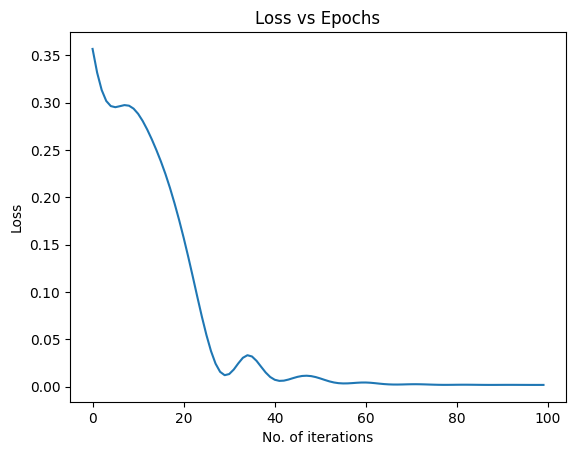

In [116]:
# Plotting the loss
x=range(epochs)
plt.plot(x,e_loss)
plt.xlabel('No. of iterations')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [117]:
# testing the model

test_pred=model(test_seq).cpu().detach().numpy()
test_pred=in_scaler.inverse_transform(test_pred).flatten()

# calculating the R2 score

r2_score(test_tar, test_pred)


0.9852688139285354

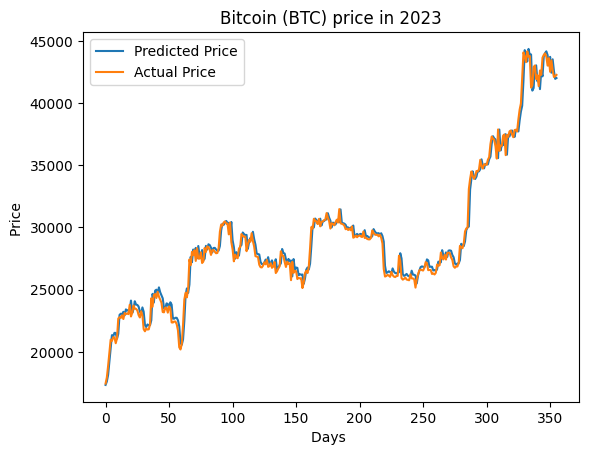

In [118]:
# plotting the predicted prices against the actual prices

plt.title('Bitcoin (BTC) price in 2023')
plt.plot(test_pred, label='Predicted Price')
plt.plot(test_tar, label='Actual Price')
plt.ylabel('Price ')
plt.xlabel('Days ')
plt.legend()
plt.show()

In [119]:
# MSE

mse = mean_squared_error(test_tar, test_pred)/len(test_tar)

mse_purcentage = mse/np.mean(test_tar)

print('On average, the model is wrong by', mse_purcentage*100, '% of the actual price.')

On average, the model is wrong by 4.5220638496858605 % of the actual price.


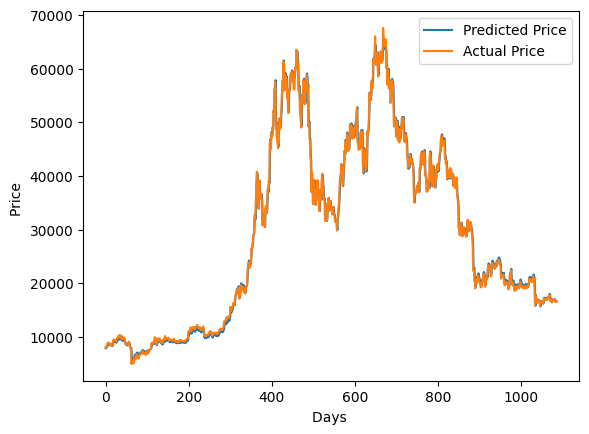

In [120]:
# on the train 

train_pred=model(train_seq).cpu().detach().numpy()

train_pred=in_scaler.inverse_transform(train_pred).flatten()



plt.plot(train_pred, label='Predicted Price')
plt.plot(in_scaler.inverse_transform(train_tar.cpu().detach().numpy()).flatten(), label='Actual Price')
plt.ylabel('Price ')
plt.xlabel('Days ')
plt.legend()
plt.show()

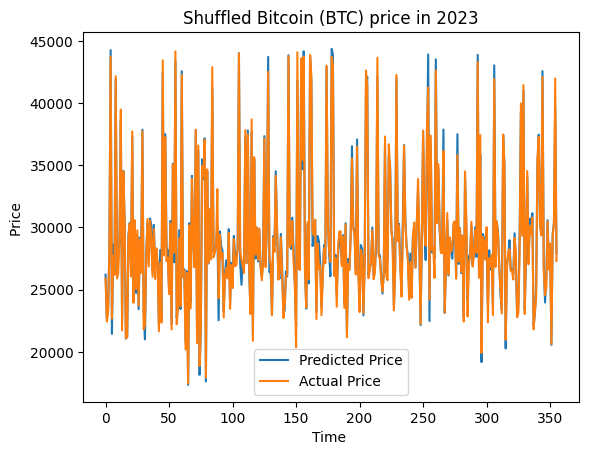

In [121]:
# shuffling the test set

from sklearn.utils import shuffle

test_seq_shuffled, test_tar_shuffled = shuffle(test_seq, test_tar)

# testing the model

test_pred=model(test_seq_shuffled).cpu().detach().numpy()
test_pred=in_scaler.inverse_transform(test_pred).flatten()

# plotting the predicted prices against the actual prices

plt.title('Shuffled Bitcoin (BTC) price in 2023')
plt.plot(test_pred, label='Predicted Price')
plt.plot(test_tar_shuffled, label='Actual Price')
plt.ylabel('Price ')
plt.xlabel('Time ')
plt.legend()
plt.show()
